In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

model1 = pd.read_csv("./submit/submit_regnety_080_384_99.53.csv")
model2 = pd.read_csv("./submit/submit_swin_base_patch4_window12_384_in22k_99.76.csv")
model3 = pd.read_csv("./submit/submit_swin_base_patch4_window7_224_in22k_99.58.csv")
model4 = pd.read_csv("./submit/submit_swin_large_patch4_window7_224_in22k_99.53.csv")
model5 = pd.read_csv("./submit/submit_twins_pcpvt_base_384_99.61.csv")
model6 = pd.read_csv("./submit/submit_vit_base_patch16_384_99.56.csv")
model7 = pd.read_csv("./submit/submit_wide_resnet101_2_384_99.51.csv")
model8 = pd.read_csv("./submit/submit_xcit_small_24_p16_384_dist_99.64.csv")
model9 = pd.read_csv("./submit/submit_gluon_resnet101_v1s_384_99.55.csv")

In [2]:
record = {}

In [3]:
for item in range(len(model1)):
    listKeys = ["tomato", "sugarcane", "soybean", "rice", "pumpkin",
               "pineapple", "peanut", "guava", "garlic", "dragonfruit", 
               "corn", "carrot", "bareland", "banana"]
    dic_category = dict.fromkeys(listKeys, 0)
    dic_category[model1.iloc[item]["label"]] += 1
    dic_category[model2.iloc[item]["label"]] += 1
    dic_category[model3.iloc[item]["label"]] += 1
    dic_category[model4.iloc[item]["label"]] += 1
    dic_category[model5.iloc[item]["label"]] += 1
    dic_category[model6.iloc[item]["label"]] += 1
    dic_category[model7.iloc[item]["label"]] += 1
    dic_category[model8.iloc[item]["label"]] += 1
    dic_category[model9.iloc[item]["label"]] += 1
    max_value  = max(dic_category.values())
    
    for key, value in dic_category.items():
        if(value == max_value):
            record[model1.iloc[item]["image_filename"]] = (key, value)
            break

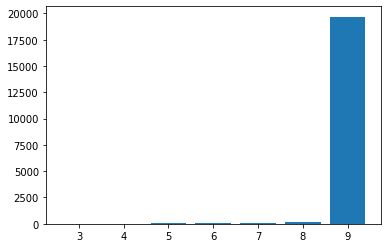

In [4]:
category = []
count = {}
for item, value in record.items():
    if value[1] in count:
        count[value[1]] += 1
    else:
        count[value[1]] = 1
    category.append(value[0])
        
plt.bar(count.keys(), count.values())
plt.show()

In [5]:
submit = pd.DataFrame()  
submit["image_filename"] = record.keys()
submit["label"] = category
submit.to_csv("res.csv", index=False)